<a href="https://colab.research.google.com/github/jotaperes/Ciencia-de-Dados/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Utilizando o método KMeans

Este programa visa utiizar o método KMeans para agrupar clientes fictícios.

O código implementado foi reproduzido do bootcamp Diversidata - IGTI/Banco Pan.

In [ ]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline 
#Permite que os gráficos apareçam na tela

In [ ]:
clientes = pd.read_excel("dados_clientes.xlsx")
estados = pd.read_csv("estados_brasileiros.csv", sep = ";", encoding='latin-1')
idade = pd.read_csv("idade_clientes.csv", sep = ";")

#Início do tratamento dos Dados

In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


##Verificando a ausência de dados

In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

Existem três formas de tratar o problema de se ter dados ausentes:


1.   **Exclusão da linha**:
  Usado principalmente quando se tem um banco muito grande e que não vai fazer diferença a exclusão daqueles valores
2.   **Inclusão da média no lugar do *null***:
  Bastante usado, mas cabe lembrar que a média é influenciada por *outliers*.
1.   **Inclusão da mediana no lugar do *null***:














In [ ]:
#Excluindo dados
clientes.dropna(subset=["peso"], inplace=True) #inplace = True significa que quer alterar os dados naquele dataframe
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
estados

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espírito Santo,es,Brasil
8,9,Goiás,go,Brasil
9,10,Maranhão,ma,Brasil


In [ ]:
#media = clientes.peso.mean()
#mediana = clientes.peso.median()
#media = round(media, 2) #arredondando o valor da média

In [ ]:
clientes.peso.fillna(media, inplace = True) #inserindo a média dentro dos valores ausentes
estados.pais.fillna("Brasil", inplace = True) #inserindo "Brasil" nos valores ausentes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5a7c7eed0>]],
      dtype=object)

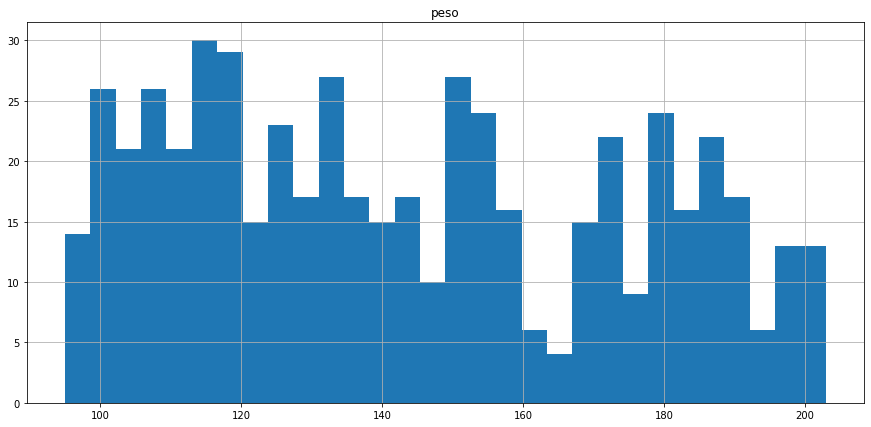

In [ ]:
clientes.hist(column = 'peso', figsize=(15,7), bins=30)

In [ ]:
#criando um identificador para a variável gênero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5a7c0e790>]],
      dtype=object)

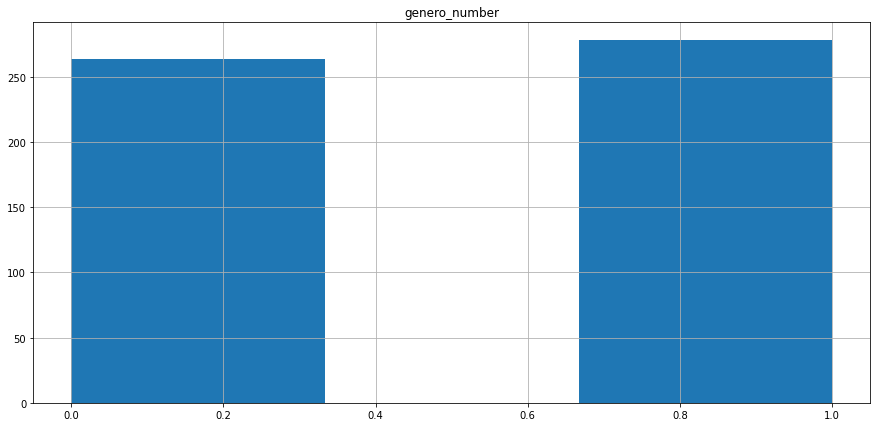

In [ ]:
clientes.hist(column = 'genero_number', figsize= (15,7), bins = 3)

##Junções entre as tabelas
Nesta etapa, vou conectar os datasets

In [ ]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
#realiza a junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True) #reseta o index e cria um novo índice

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
537,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
538,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
539,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
540,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


##Organizando a base de dados
Nesta etapa, vou alterar os nomes das colunas para facilitar a manipulação

In [ ]:
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
#Alterando as linhas da variável sigla_estado para maiúscula
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

#Análise de Dados

##Método Cotovelo
Utilizado para identificar o número de clusters necessários para realizar o agrupamento

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
#criando uma função para calcular o wcss
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [ ]:
dados_cliente = base_completa[['peso', 'colesterol']]
wcss_clientes = calcular_wcss(dados_cliente)
wcss_clientes

[1345138.9833948342,
 326459.1691111843,
 138693.0477412159,
 80340.41985747957,
 53126.82072991741,
 37151.58502675869,
 27299.16123133034,
 21793.599301067796,
 16968.587548997402,
 14472.27645213711]

In [ ]:
import plotly.express as px #Criação de gráficos dinamicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de gráficos

In [ ]:
grafico_wcss = px.line(
    x = range(1,11),
    y = wcss_clientes
)
fig = go.Figure(grafico_wcss)
fig.update_layout(title = "Calculando o WCSS",
                  xaxis_title = "Número de Clusters",
                  yaxis_title = 'Valor do WCSS',
                  template = 'plotly_white')
fig.show()

In [ ]:
kmeans_clientes = KMeans(n_clusters = 4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)
base_completa['cluster']
#atribuo a cada linha um cluster, baseado em dados_cliente

0      1
18     1
40     1
65     3
87     3
      ..
443    0
478    3
178    1
396    3
123    2
Name: cluster, Length: 547, dtype: int32

#Criando os centroides

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[107.45637584, 120.69798658,  43.58389262],
       [154.33621622, 189.84684685,  42.73873874],
       [185.02758621, 219.6137931 ,  42.84827586],
       [130.21746479, 157.22535211,  41.94366197]])

##Visualizando os centroides

In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])
#Cria o gráfico utilizando os dados da base completa e colorindo de acordo com o cluster atribuído lá atrás
grafico_controle = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
#Permite a visualização dos centroides no gráfico
grafico_final_petala = go.Figure(data = grafico.data + grafico_controle.data)
grafico_final_petala.show()

##Deixando o gráfico mais bonito

In [ ]:
grafico = px.scatter(x= base_completa['colesterol'],
                     y = base_completa['peso'],
                     color = base_completa['cluster'])
fig = go.Figure(grafico)
fig.update_layout(title = 'Analise de clusters',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'Peso')
fig.show()

#Criando função para Gerar Gráficos

In [ ]:
def plotar_grafico(x, y):
  grafico = px.scatter(x= x,
                     y = y,
                     color = base_completa['cluster']
                     )
  grafico.show()
  fig = go.Figure(grafico)
  fig.update_layout(title = "Analise de Clusters")

  fig.show()

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'])